In [1]:
# Importing the neccessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

In [2]:
# Load dataset
df = pd.read_csv(r'dataset/dealer_export.csv')
df2=df.copy()

In [ ]:
# Correcting the data types for certain columns\n",
df['did'] = df['did'].astype('object')
df['reg_code']=df['reg_code'].astype('object')

In [ ]:
# Pulling categorical columns
categorical=[] # Creating an empty list
categorical= [col for col in df.columns if df[col].dtypes=="O"] # Storing all the categorical columns here

In [ ]:
# Encode categorical features
encoder= LabelEncoder() #Initialising Label Encoder
df[categorical] = df[categorical].apply(lambda col: encoder.fit_transform(col))

In [ ]:
# Performing Scaler Trasnformation for numerical features
scaler=StandardScaler()
df[df.columns]=scaler.fit_transform(df)

In [ ]:
# Determine optimal number of clusters (Elbow Method)
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

In [ ]:
# Create the Elbow graph using Plotly Express
fig = px.line(x=range(1, 10), y=inertia, title='Elbow Method', labels={'x': 'Number of Clusters', 'y': 'Inertia'})
fig.update_traces(mode='markers+lines')  # Adding markers to the line plot
fig.show()

In [ ]:
# Perform KMeans clustering with optimal clusters
optimal_clusters = 6  # Set based on the elbow graph
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(df)

In [ ]:
# Add cluster labels to a separate data
df2['cluster'] = clusters

In [ ]:
# Reduce dimensions to 3D using PCA
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df)

# Create a DataFrame for the 3D visualization
df_viz = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2', 'PCA3'])
df_viz['cluster'] = clusters
df_viz['trading_name'] = df['trading_name']  # Example for labeling points (optional)

# Plot clusters in 3D using Plotly Express
fig = px.scatter_3d(
    df_viz, x='PCA1', y='PCA2', z='PCA3',
    color='cluster', symbol='cluster'
    hover_data=['trading_name'],  # Adjust this as needed
    title='3D Visualization of Clusters'
    )
    
fig.update_traces(marker=dict(size=5))
fig.show()
# Save the plot to an HTML file
fig.write_html("cluster_visualization.html")
print("Visualization saved to 'cluster_visualization.html'. Open this file in your browser to view the plot.")

In [ ]:
# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

# Create a DataFrame for the 2D visualization
df_viz = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_viz['cluster'] = clusters
df_viz['trading_name'] = df['trading_name']  # Example for labeling points (optional)

# Plot clusters in 2D using Plotly Express
fig = px.scatter(
    df_viz, x='PCA1', y='PCA2',
    color='cluster', symbol='cluster',
    hover_data=['trading_name'],  # Adjust this as needed
    title='2D Visualization of Clusters'
)

fig.update_traces(marker=dict(size=5))
fig.show()

# Save the plot to an HTML file
fig.write_html("cluster_visualization_2d.html")
print("Visualization saved to 'cluster_visualization_2d.html'. Open this file in your browser to view the plot.")


In [9]:
df3=df.drop(df.columns[:2],axis=1)

In [10]:
df3.head()

,Stock Turn,Avg. Days To Sell,Avg. Sale by Year,Count_Live,Count_Sold
0,NaN,NaN,276,0,69
1,NaN,NaN,20,0,5
2,NaN,NaN,592,0,148
3,NaN,NaN,512,0,128
4,NaN,NaN,412,0,103


In [11]:
df3.corr()

,Stock Turn,Avg. Days To Sell,Avg. Sale by Year,Count_Live,Count_Sold
Stock Turn,1.000000,-0.298079,0.433653,-0.093313,0.433653
Avg. Days To Sell,-0.298079,1.000000,-0.146970,-0.002273,-0.146970
Avg. Sale by Year,0.433653,-0.146970,1.000000,0.540756,1.000000
Count_Live,-0.093313,-0.002273,0.540756,1.000000,0.540756
Count_Sold,0.433653,-0.146970,1.000000,0.540756,1.000000


In [12]:
df3.boxplot

<bound method boxplot_frame of      Stock Turn  Avg. Days To Sell  Avg. Sale by Year  Count_Live  Count_Sold
0           NaN                NaN                276           0          69
1           NaN                NaN                 20           0           5
2           NaN                NaN                592           0         148
3           NaN                NaN                512           0         128
4           NaN                NaN                412           0         103
..          ...                ...                ...         ...         ...
805    1.066667         342.187500                 48          45          12
806    1.133333         322.058824                 68          60          17
807    7.619048          47.906250                960         126         240
808   13.200000          27.651515                264          20          66
809    2.554622         142.878289                608         238         152

[810 rows x 5 columns]>

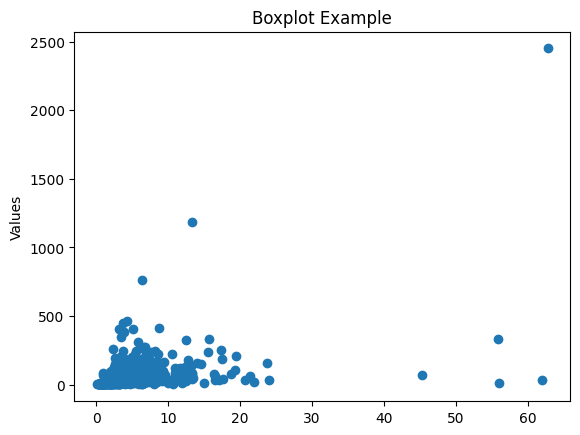

In [23]:
import matplotlib.pyplot as plt
plt.scatter(df3["Stock Turn"], df3["Count_Sold"])
plt.title("Boxplot Example")
plt.ylabel("Values")
plt.show()

In [16]:
df3 = df3.dropna(axis=0, how='any', inplace=False)